In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pymc3 as pm

WARNING (theano.configdefaults): install mkl with `conda install mkl-service`: No module named 'mkl'


In [4]:
data_table = pd.read_csv("../Project2/diet_and_atp.tsv", sep='\t')
data_table.head()

,Protein,Carbohydrates,Fat,ATP
0,1.95,6.92,0.02,9.44
1,0.64,2.65,0.15,4.04
2,1.82,0.98,0.21,3.72
3,1.80,4.69,0.23,7.54
4,0.93,4.22,0.02,5.70


## 1) Write a python script that construct the model that we were investigating in pyMC3.


**ATP** = **a  Proteins + b  Carbohydrates + c  Fats +** **ε** 

Knowing that each value of Protein, Carbohydrates and Fats is a relative value to a maximum established by the researchers chosen in a random fashion to gives as a diet to the patients.

**Proteins ~ Uniform(0,1)**

**Carbohydrates ~ Uniform(0,1)**

**Fats ~ Uniform(0,1)**

The values of Proteins, Carbohydrates and Fats in the file are the ones measured to the patients afterwards in blood tests.

In [8]:
# I create my parametric model (making initial guesses)
with pm.Model() as model:
    a = pm.Uniform("a",0,5)
    b = pm.Uniform("b",0,5)  
    c = pm.Uniform("c",0,5) 
    Prot = data_table["Protein"]
    Car = data_table["Carbohydrates"]
    Fat = data_table["Fat"]


# This says that the random variable lambda_ is equal to lambda_1 if bigger than tau or lambda_2 otherwise
with model:
    atp_ = a*Prot+b*Car+c*Fat

# We add the observations to the model
with model:
    observation = pm.Poisson("obs", atp_, observed=data_table["ATP"])

## 2) Fulfill the observations within the model and run the Metropolis algorithm to infer posterior probabilities.

In [9]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [c]
>Metropolis: [b]
>Metropolis: [a]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:26<00:00, 2300.48draws/s]
The number of effective samples is smaller than 10% for some parameters.


## 3) Plot the traces and the posterior, and explain the results obtained with your own words, but being as much formal as you can.

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, '$\\lambda_1$ value')

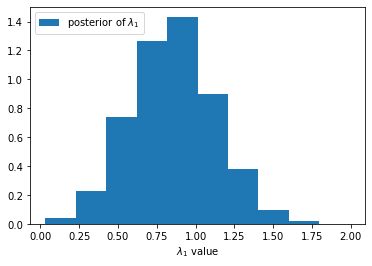

In [10]:
plt.hist(trace["a"], label="posterior of a", normed=True)
plt.legend(loc="upper left")
plt.xlabel("a value")

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'b value')

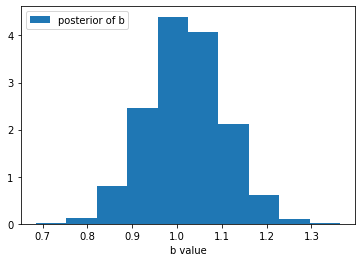

In [11]:
plt.hist(trace["b"], label="posterior of b", normed=True)
plt.legend(loc="upper left")
plt.xlabel("b value")

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


Text(0.5, 0, 'c value')

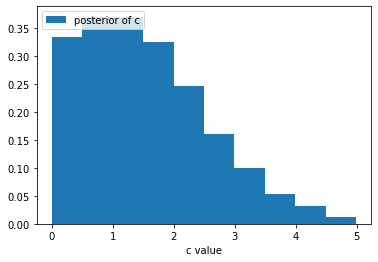

In [12]:
plt.hist(trace["c"], label="posterior of c", normed=True)
plt.legend(loc="upper left")
plt.xlabel("c value")

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.


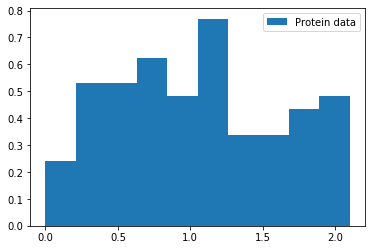

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  after removing the cwd from sys.path.


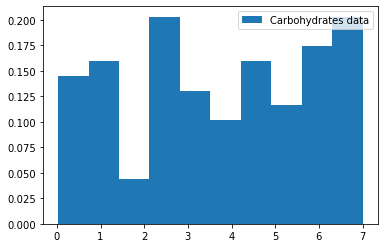

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  import sys


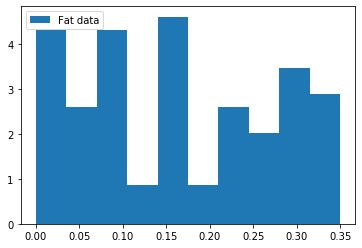

In [21]:
plt.hist(data_table["Protein"], label="Protein data", normed=True)
plt.legend(loc="upper right")
plt.show()
plt.hist(data_table["Carbohydrates"], label="Carbohydrates data", normed=True)
plt.legend(loc="upper right")
plt.show()
plt.hist(data_table["Fat"], label="Fat data", normed=True)
plt.legend(loc="upper left")
plt.show()

I have obtained that a and b clearly are arround 1, wich coincides with the results obtained in the last practice.Their posterior distributions have only one maximum. On the other hand, c posterior distribution have also a maxima near 1 but have a weider distribution. That is probably due to the Fat values being smaller than other mesured nutriens being so, c * Fat will in most data cases be contributing less than b * Carbohydrates even if c = 5 and b = 1. We can observe that in fact the same is happening with a, as Carbohydrates have a wide distribution, b is the most important to predict factor.

## Repeat, using the uniform distributions instead of the data:

**Proteins ~ Uniform(0,1)**

**Carbohydrates ~ Uniform(0,1)**

**Fats ~ Uniform(0,1)**

The values of Proteins, Carbohydrates and Fats in the file are the ones measured to the patients afterwards in blood tests.

In [13]:
# I create my parametric model (making initial guesses)
with pm.Model() as model:
    a = pm.Uniform("a",0,5)
    b = pm.Uniform("b",0,5)  
    c = pm.Uniform("c",0,5) 
    Prot = pm.Uniform("Protein",0,1)
    Car = pm.Uniform("Carbohydrates",0,1)
    Fat = pm.Uniform("Fat",0,1)


# This says that the random variable lambda_ is equal to lambda_1 if bigger than tau or lambda_2 otherwise
with model:
    atp_ = a*Prot+b*Car+c*Fat

# We add the observations to the model
with model:
    observation = pm.Poisson("obs", atp_, observed=data_table["ATP"])

In [14]:
with model:
    step = pm.Metropolis()
    trace = pm.sample(10000, tune=5000,step=step)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>Metropolis: [Fat]
>Metropolis: [Carbohydrates]
>Metropolis: [Protein]
>Metropolis: [c]
>Metropolis: [b]
>Metropolis: [a]
Sampling 4 chains, 0 divergences: 100%|██████████| 60000/60000 [00:56<00:00, 1055.20draws/s]
The number of effective samples is smaller than 10% for some parameters.


/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  """Entry point for launching an IPython kernel.
/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  


Text(0.5, 0, 'Protein value')

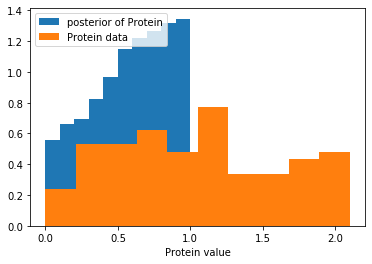

In [16]:
plt.hist(trace["Protein"], label="posterior of Protein", normed=True)
plt.hist(data_table["Protein"], label="Protein data", normed=True)
plt.legend(loc="upper left")
plt.xlabel("Protein value")

I did this because in the first attempt I had not used the given distributions for the nutriens. However I do not know what to conclude. The prior distributions given do not fit the real data, so they are not comparable. Moreover, training the formula **ATP** = **a  Proteins + b  Carbohydrates + c  Fats +** **ε** taking both nutrients and constants as independant unknowns will probably give ambiguous results as a * b = b * a. So a and Proteins values would be interchangeable for the model.